# Рынок заведений общественного питания Москвы

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
  
  
  Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Описание данных

**/datasets/rest_data.csv** — данные о заведениях общественного питания Москвы:  
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест


## Оглавление
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)  
    1.1 [Вывод к Шагу 1](#step1.1)
    
        
2. [Шаг 2. Подготовка данных](#step2)  
    2.1  [Вывод к Шагу 2](#step2.1)     
  
    
3. [Шаг 3. Анализ данных](#step3)   
    3.1   [Cоотношение видов объектов общественного питания по количеству](#step3.1)  
    3.2   [Cоотношение сетевых и несетевых заведений по количеству](#step3.2)  
    3.3   [Для какого вида объекта общественного питания характерно сетевое распространение](#step3.3)  
    3.4   [Ответ на вопрос: что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step3.4)  
    3.5   [Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Ответ на вопрос: какой вид предоставляет в среднем самое большое количество посадочных мест ](#step3.5)   
    3.6   [Выделение в отдельный столбец информации об улице из столбца `address`](#step3.6)   
    3.7   [Построим график топ-10 улиц по количеству объектов общественного питания. Используем внешнюю информацию и дадим ответ на вопрос: в каких районах Москвы находятся эти улицы?](#step3.7)   
    3.8   [Найдём число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?](#step3.8)  
    3.9   [Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step3.9)   
    
 
4. [Шаг 4. Общий вывод. Рекомендации](#step5)  

### Шаг 1. Откройте файлы с данными и изучите общую информацию <a id="step1"></a>   
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
import math
import numpy as np
from functools import reduce
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import plotly.express as px


rest_data = pd.read_csv('/datasets/rest_data.csv')


Выведем наш датасет и информацию о нём на экран

In [2]:
display(rest_data)
rest_data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


### Вывод<a id="step1.1"></a>   
</div>  

В датасете содержится 15366 записей о ресторанах. Очевидно записи делались или разными людьми, или с помощью разных инструментов. Так многие названия в `object_name` написаны Caps Lock'ом, есть лишние символы, в названии присутствует отсылка к типу объекта.   

Дополнительно изучим столбцы `object_name, chain и number` на наличие артефактов.

Также в следующем этапе отработаем гипотетические дубликаты и/или пропущенные значения.


### Шаг 2. Предобработка данных <a id="step2"></a>   
</div>  

Для удобства переименуем столбец `number` в `seats`, чтобы название больше отражало его суть.

In [3]:
rest_data = rest_data.rename(columns={'number':'seats'})

Снизим накал и приведём все к нижнему регистру в столбцах с записями: `object_name, object_type и adress`.

In [4]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_type'] = rest_data['object_type'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

Посмотрим нет ли у нас дубликатов

In [5]:
rest_data.duplicated().sum()

0

Убедимся, что пропущенных значений действительно нет

In [6]:
rest_data.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
seats          0
dtype: int64

Проведём проверку нескольких столбцов на предмет наличия артефактов в значениях

In [7]:
display(rest_data[['chain','object_type']].apply(lambda x: x.value_counts()).T.stack())

chain        да                                    2968.0
             нет                                  12398.0
object_type  бар                                    856.0
             буфет                                  585.0
             закусочная                             360.0
             кафе                                  6099.0
             кафетерий                              398.0
             магазин (отдел кулинарии)              273.0
             предприятие быстрого обслуживания     1923.0
             ресторан                              2285.0
             столовая                              2587.0
dtype: float64

Для удобства сделаем небольшой ребрендинг: *предприятия быстрого обслуживания* превратим в *фастфуды*, а сложный *магазин (отдел кулинарии)* - в кулинарию

In [8]:
rest_data['object_type'] = rest_data['object_type'].str.replace('предприятие быстрого обслуживания', 'фастфуд')
rest_data['object_type'] = rest_data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

Аналогично для удобства и лучшего понимания в дальнейшем на графиках заменим значения *да* и *нет* в столбце `chain` на *сетевой* и *несетевой* тип объекта соответственно

In [9]:
rest_data['chain'] = rest_data['chain'].map({'нет':'несетевой','да':'сетевой'})

Построим гистограмму распределения числа посадочных мест и проверим возможные выбросы. Параллельно с этим применим метод `describe()`

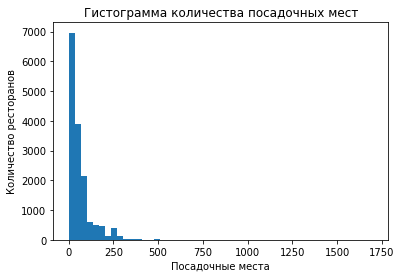

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: seats, dtype: float64

In [10]:
plt.hist(rest_data['seats'], bins = 50)
plt.title('Гистограмма количества посадочных мест')
plt.xlabel('Посадочные места')
plt.ylabel('Количество ресторанов')
plt.show()
rest_data['seats'].describe()

Есть ряд очень вместительных ресторанов, они достаточно сильно влияют на среднее значения (по сравнению с медианным). Посмотрим кто вмещает в себя больше 700 посетителей одновременно.

In [11]:
rest_data_large_seats = rest_data.query('seats > 700')
display(rest_data_large_seats)

,id,object_name,chain,object_type,address,seats
2313,26560,ресторан «альфа»,несетевой,ресторан,"город москва, измайловское шоссе, дом 71, корп...",1040
3686,27026,рум сервис,несетевой,ресторан,"город москва, площадь европы, дом 2",1200
4480,27024,рум сервис,несетевой,ресторан,"город москва, кутузовский проспект, дом 2/1, с...",1200
5649,29232,столовая московский гуманитарный университет,несетевой,столовая,"город москва, улица юности, дом 5, строение 1",760
8148,80291,банкетный зал шелк,несетевой,ресторан,"город москва, большой саввинский переулок, дом...",1500
8345,27750,столовая-буфет,несетевой,столовая,"город москва, улица волхонка, дом 15",1400
9064,19719,комбинат питания «управление академсервис»,несетевой,столовая,"город москва, проспект вернадского, дом 84, ст...",1288
9955,171116,eataly,несетевой,ресторан,"город москва, киевская улица, дом 2",920
12723,199696,arena by soho family,несетевой,бар,"город москва, кутузовский проспект, дом 36, ст...",1700


Достаточно разношерстная компания собралась, есть и фудкорты типа *eataly* и банкет-холлы (*шёлк*, *arena* и т.д.), а есть и просто столовая МГУ. Туда бы наших роботов! Пока оставим их в покое. 

Посмотрим ещё раз на гистограмму в диапазоне, близком к нулю

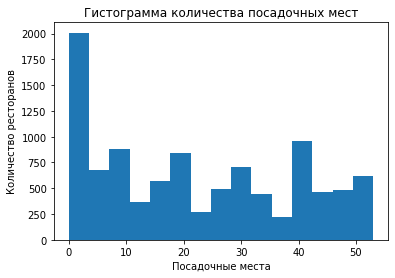

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: seats, dtype: float64

In [12]:
plt.hist(rest_data['seats'], bins = 15, range = (0,53))
plt.title('Гистограмма количества посадочных мест')
plt.xlabel('Посадочные места')
plt.ylabel('Количество ресторанов')
plt.show()
rest_data['seats'].describe()

Посмотрим на наши "нулевые" по вместимости заведения

In [13]:
display(rest_data.query('seats == 0').head(10))

,id,object_name,chain,object_type,address,seats
137,115498,пекарня & донер,несетевой,закусочная,"город москва, бутырская улица, дом 9, корпус 2",0
154,152556,шаурма в пите,несетевой,фастфуд,"город москва, варшавское шоссе, дом 72, корпус 2",0
157,149568,суши,несетевой,фастфуд,"город москва, улица маршала василевского, дом ...",0
190,126956,"шаурма, куры-гриль",несетевой,фастфуд,"город москва, 1-я владимирская улица, дом 21",0
195,149531,"шаурма, куры-гриль",несетевой,фастфуд,"город москва, 2-я владимирская улица, дом 44/10",0
198,124201,"шаурма, выпечка",несетевой,фастфуд,"город москва, 3-я владимирская улица, дом 27",0
206,150836,гбоу школа №1468,несетевой,столовая,"город москва, волгоградский проспект, дом 17, ...",0
219,156226,суши-шоп,несетевой,закусочная,"город москва, волоколамское шоссе, дом 92",0
240,154738,пекарня,несетевой,фастфуд,"город москва, улица гастелло, дом 37",0
278,25742,бистро,несетевой,фастфуд,"город москва, тверская улица, дом 27, строение 1",0


Эх, куда же мы без шаурмы. Как и в жизни, в аналитике не можем от неё отказаться. Может ли робот сделать такую же вкусную  и опасную шаурму как на площади 3 вокзалов? А написать симфонию?

Соберем столбец `duplicates`, в котором соберем значения из `object_name`, `address` и `seats` (предварительно переведенный в формат `str`.  

Затем посчитаем количество дубликатов и удалим эти строки

In [14]:
rest_data['duplicates'] = rest_data['object_name'] + rest_data['address'] + str(rest_data['seats'])
print('Количество неполных дубликатов (без столбца id):', rest_data['duplicates'].duplicated().sum())
rest_data['duplicates'].drop_duplicates()
rest_data.head(5)


Количество неполных дубликатов (без столбца id): 225


,id,object_name,chain,object_type,address,seats,duplicates
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48,"сметанагород москва, улица егора абакумова, до..."
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,"родникгород москва, улица талалихина, дом 2/1,..."
2,24309,кафе «академия»,несетевой,кафе,"город москва, абельмановская улица, дом 6",95,"кафе «академия»город москва, абельмановская ул..."
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40,"пиццеториягород москва, абрамцевская улица, до..."
4,119365,кафе «вишневая метель»,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,"кафе «вишневая метель»город москва, абрамцевск..."


Своё очищающее дело столбец `duplicates` сделал, можем его удалить

In [15]:
rest_data.drop(['duplicates'], axis = 'columns', inplace = True)
rest_data.head(15)

,id,object_name,chain,object_type,address,seats
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевой,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,несетевой,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,сетевой,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,несетевой,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,несетевой,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,несетевой,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


### Вывод <a id="step2.1"></a>   
</div>  

- В датасете не обнаружено дубликатов и пропущенных значений.  

- Уменьшили "эмоциональность", понизив её до нижнего регистра в части столбцов.  

- Проверили выбросы в количестве посадочных мест и отметили их влияние на среднее значение. 
  
- Немного переименовали названия типов заведения, чтобы читать данные было проще.

- Разобрались с неполными дубликатами, они больше не будут портить наш датасет. 

Можем двигаться дальше, непосредственно к аналитике


### Шаг 3. Анализ данных <a id="step3"></a>   
</div>  

### Cоотношение видов объектов общественного питания по количеству <a id="step3.1"></a>   
</div>  

Сгруппируем наш датасет по объектам и построим график количества объектов по типу

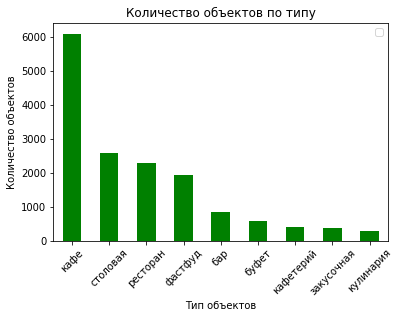

In [16]:
rest_data_type = rest_data.groupby('object_type').count().reset_index()
ax = rest_data_type.set_index('object_type').sort_values('seats', ascending = False).plot(kind = 'bar', color = 'green')
ax.set_title('Количество объектов по типу')
ax.set_xlabel('Тип объектов')
ax.set_ylabel('Количество объектов')
ax.legend('')
plt.xticks(rotation = 45)
plt.show()


In [17]:
display(rest_data.groupby('object_type')['object_name'].count().sort_values(ascending = False))

object_type
кафе          6099
столовая      2587
ресторан      2285
фастфуд       1923
бар            856
буфет          585
кафетерий      398
закусочная     360
кулинария      273
Name: object_name, dtype: int64

Как мы видим, абсолютный лидер - это **кафе**. Более чем в два раза от данного типа отстают **фастфуды, рестораны и столовые**. Все остальные - ещё дальше. 

### Cоотношение сетевых и несетевых заведений по количеству <a id="step3.2"></a>   
</div>  

Теперь сгруппируем нашу таблицу по категории `chain`.

In [18]:
rest_data_chain = rest_data.groupby('chain')['object_name'].count().sort_values()
display(rest_data_chain)

chain
сетевой       2968
несетевой    12398
Name: object_name, dtype: int64

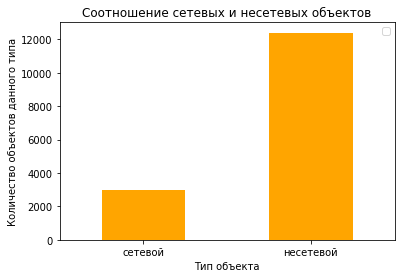

In [19]:
ax = rest_data_chain.plot(kind = 'bar', color = 'orange')
ax.set_title('Соотношение сетевых и несетевых объектов')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов данного типа')
ax.legend('')
plt.xticks(rotation = 0)
plt.show()

Как мы видим, несетевых объектов в 4 раза больше, чем сетевых. 

### Для какого вида объекта общественного питания характерно сетевое распространение <a id="step3.3"></a>   
</div>  

Для ответа на этот вопрос сделаем срез по сетевым магазинам. Выведем первые 5 строк новой таблицы

In [20]:
rest_data_net = rest_data.query('chain == "сетевой"')
display(rest_data_net.head(5))


,id,object_name,chain,object_type,address,seats
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40
6,148815,брусника,сетевой,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,22579,алло пицца,сетевой,кафе,"город москва, улица авиаторов, дом 14",32
16,144107,суши wok,сетевой,фастфуд,"город москва, азовская улица, дом 3",7
18,58565,тануки,сетевой,ресторан,"город москва, большая академическая улица, дом 65",160


In [21]:
rest_data_chain_pivot = pd.pivot_table(rest_data, 
                                       index = ['object_type'], 
                                       values = ['object_name'],
                                       columns = 'chain',
                                       aggfunc = 'count')
rest_data_chain_pivot.columns = ['not_net', 'net']
rest_data_chain_pivot['ratio'] = rest_data_chain_pivot['net']/(rest_data_chain_pivot['net']+rest_data_chain_pivot['not_net'])
rest_data_chain_pivot = rest_data_chain_pivot.sort_values('ratio').round(3)
display(rest_data_chain_pivot)

,not_net,net,ratio
object_type,,,
столовая,2584,3,0.001
буфет,574,11,0.019
бар,819,37,0.043
кафетерий,346,52,0.131
закусочная,304,56,0.156
кафе,4703,1396,0.229
ресторан,1741,544,0.238
кулинария,195,78,0.286
фастфуд,1132,791,0.411


По аналогии с первым этапом шага, сгруппируем нашу новую таблицу и построим графики

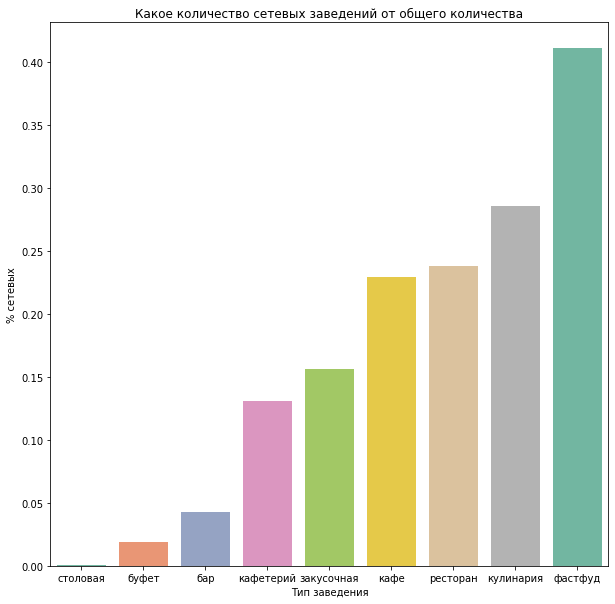

In [22]:
fig, ax = plt.subplots()
ax = sns.barplot(data = rest_data_chain_pivot, x = rest_data_chain_pivot.index, y = 'ratio', palette = 'Set2')
ax.set_title('Какое количество сетевых заведений от общего количества')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('% сетевых')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

Сетевых **столовых** (как и **буфетов**) почти не обнаружено. Безусловно лидирует **фастфуд**. Что вполне логично - такого типа заведения чаще всего и бывают сетевыми. За ним следуют **кулинария, рестораны и кафы**.


### Ответ на вопрос: что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? <a id="step3.4"></a>   
</div>  

Для начала построим гистограмму распределения количества посадочных мест для сетевых заведений

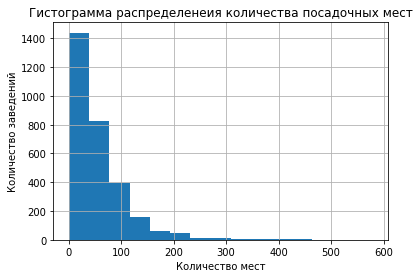

In [23]:
rest_data_net['seats'].hist(bins = 15)
plt.title('Гистограмма распределенеия количества посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Количество заведений')
plt.show()

Теперь построим ящик с усами и выведем значения методом `describe`

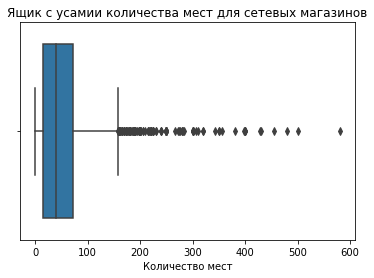

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
90%       120.000000
max       580.000000
Name: seats, dtype: float64

In [24]:
ax = sns.boxplot(x = rest_data_net['seats'])
ax.set_title('Ящик с усамии количества мест для сетевых магазинов')
ax.set_xlabel('Количество мест')
plt.show()

display(rest_data_net['seats'].describe([0.25, 0.5, 0.75, 0.9]))

В целом, вопрос звучит достаточно странно, так как одно условие *много заведений с малым количеством мест* не противоречит другому условию *мало заведений с большим количеством мест*. И тот, и другой ответ может быть (и являются в данном случае) правильными. 

### Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Ответ на вопрос: какой вид предоставляет в среднем самое большое количество посадочных мест <a id="step3.5"></a>   
</div>  

Лучше всего нам для ответа на поставленный вопрос помогут ящики с усами и опять же метод `describe`

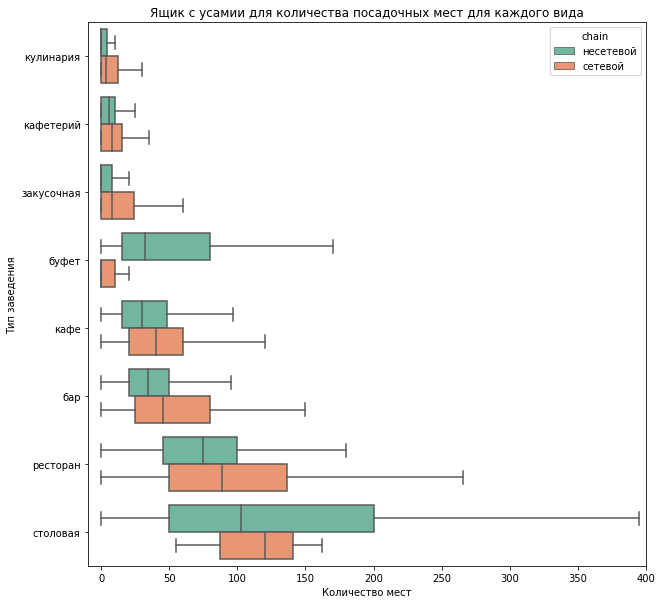

In [25]:
fig, ax = plt.subplots()
ax = sns.boxplot(data = rest_data, 
                 x = 'seats', 
                 y = 'object_type', 
                 order = ["кулинария", "кафетерий", "закусочная", "буфет", "кафе", "бар", "ресторан", "столовая"], 
                 hue = 'chain', 
                 showfliers = False,
                 palette = 'Set2')
ax.set_title('Ящик с усамии для количества посадочных мест для каждого вида')
ax.set_xlim(-10,400)
ax.set_xlabel('Количество мест')
ax.set_ylabel('Тип заведения')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

In [26]:
rest_data.groupby('object_type')['seats'].describe().sort_values(by = '50%', ascending = False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
фастфуд,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


Как видно из графиков и из таблицы лучше всего в среднем с местами в столовых, за ними идут рестораны. Это подтверждается и тем, что столовые как раз-таки предназначены для обслуживания как можно большего числа людей в короткий промежуток времени.  


Рестораны же действуют по другой логике: так как посетители проводят в них больше времени, то нужно и больше посадочных мест.  


Фастфудам же сильно портит статистику заведения этого типа без столиков.  

Кроме всего важного выше, было замечено интересное наблюдение. Для сетевых заведений любого типа характерна большая вместимость, чем для одиночных заведений. Единственный тип, для которого данный комментарий несправедлив - буфеты. В несетевых заведениях этого типа стараются не только угостить посетителей чем-нибудь вкусным, но и дают бОльшую возможность остановиться и отдохнуть от бешеного темпа Москвы. 

### Выделение в отдельный столбец информации об улице из столбца `address` <a id="step3.6"></a>   
</div>  

Используя регулярные выражения и str.extract выделим из столбца 'address' название улицы

In [27]:
rest_data['street'] = rest_data['address'].str.extract(',([0-9А-яё\-\s]+),')
rest_data.loc[(rest_data['street'].isnull()), 'street'] = rest_data.loc[(rest_data['street'].isnull()), 'address'].str.extract('([0-9А-яё\-\s]+),')[0]


Выведем 10 первых значений на экран

In [28]:
display(rest_data.head(10))

,id,object_name,chain,object_type,address,seats,street
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,несетевой,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,несетевой,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,сетевой,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,несетевой,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица
8,20958,кпф семья-1,несетевой,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица
9,28858,столовая мтуси,несетевой,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица


Проверим, не пропал ли кто-нибудь

In [29]:
rest_data['street'].isnull().sum()

0

Все улицы на месте, может двигаться дальше

### Построим график топ-10 улиц по количеству объектов общественного питания. Используем внешнюю информацию и дадим ответ на вопрос: в каких районах Москвы находятся эти улицы? <a id="step3.7"></a>   
</div>  

В качестве внешней информации будем использовать список всех улиц Москвы с сайта МосГаз: `https://hubofdata.ru/dataset/mosgaz-contacts/resource/92b3edb3-f4c8-4562-9338-264a666d0965`

Используя библиотеки `BytesIO` и `requests`, а также ресурс *Google Sheets* добавим внешний датасет к нам. Выведем первые 5 районов

In [30]:
from io import BytesIO
import requests
spreadsheet_id = '1ZdebiBI8kiFmeXg2OAJDLNjBhrhw17dfvvEK1Hnas80'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
#mosgaz_data_area = mosgaz_data.sort_values(by = ['street', 'area'], ascending = [True, False]).groupby('area').agg({'okrug': 'first'})


mosgaz_data = pd.read_csv(BytesIO(r.content))
mosgaz_data.columns = ['street', 'areaid', 'okrug', 'area']
mosgaz_data.head(5)



,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Подготовим данные для метода 'merge'. Уберём возможные лишние пробелы из строк и уберем верхний регистр в датасете из МосГаза.

In [31]:
rest_data['street'] = rest_data['street'].str.strip()
mosgaz_data['street'] = mosgaz_data['street'].str.strip()
mosgaz_data['street'] = mosgaz_data['street'].str.lower()
#mosgaz_data['area'] = mosgaz_data['area'].str.lower()

In [32]:
rest_data = rest_data.merge(mosgaz_data, on = 'street', how = 'left')
rest_data.head(10)


,id,object_name,chain,object_type,address,seats,street,areaid,okrug,area
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,18.0,ЦАО,Таганский район
2,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,кафе «академия»,несетевой,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,18.0,ЦАО,Таганский район
5,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,75.0,СВАО,Район Лианозово
6,119365,кафе «вишневая метель»,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,75.0,СВАО,Район Лианозово
7,27429,стол. при гоу сош № 1051,несетевой,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица,75.0,СВАО,Район Лианозово
8,148815,брусника,сетевой,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек,12.0,ЦАО,Район Арбат
9,148815,брусника,сетевой,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек,20.0,ЦАО,Район Хамовники


Найдём топ-10 районов с помощью `lambda` функции

In [33]:
display(rest_data[['area']].apply(lambda x: x.value_counts()).T.stack().head(10))


area  Тверской район         1131
      Пресненский район       791
      Басманный район         703
      Мещанский район         670
      Даниловский район       668
      Донской район           584
      Таганский район         537
      Обручевский район       494
      Район Замоскворечье     479
      Район Гагаринский       475
dtype: int64

Список самых популярных районов перед нами. По сути это весь центр, что вполне ожидаемо.

Для наглядности построим график топ-10 самых насыщенных районов

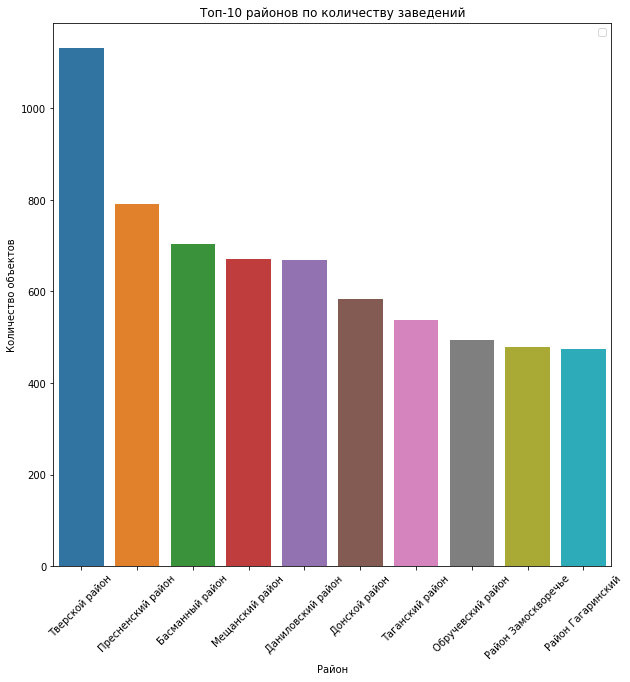

In [34]:
fig, ax = plt.subplots()
top10_area = rest_data.groupby('area').count().sort_values('id', ascending = False).head(10).reset_index()
fig.set_figheight(10)
fig.set_figwidth(10)
#display(top10_area)
ax = sns.barplot(data = top10_area, x = 'area', y = 'id')
ax.set_title('Топ-10 районов по количеству заведений')
ax.set_xlabel('Район')
ax.set_ylabel('Количество объектов')
ax.legend('')
plt.xticks(rotation = 45)
plt.show()


### Найдём число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы? <a id="step3.8"></a>   
</div>  

Применим лямбда функцию и посчитаем количество улиц с одним объектом общественного питания

In [35]:
rest_data_street = rest_data[['street']].apply(lambda x: x.value_counts()).T.stack()
print('Количество улиц с одним объектом общественного питания', rest_data_street.loc[rest_data_street == 1].count())



Количество улиц с одним объектом общественного питания 521


Теперь найдём топ-10 районов с 1 заведением на улице.

In [36]:
rest_data_area = rest_data.groupby('street').count()
rest_data_area = rest_data_area.query('id == 1')
rest_data_area = rest_data_area.reset_index()
rest_data_area_1 = list(rest_data_area['street'])
rest_data_area_1 = rest_data[rest_data['street'].isin(rest_data_area_1)]
rest_data_area_1 = rest_data_area_1[['area']].apply(lambda x: x.value_counts()).T.stack()
display(rest_data_area_1.head(10))

area  Таганский район        24
      Басманный район        23
      Район Хамовники        22
      Тверской район         19
      Район Марьина роща     16
      Пресненский район      15
      Район Сокольники       15
      Район Замоскворечье    12
      Мещанский район        12
      Район Лефортово        11
dtype: int64

Маленькие проулки и улочки Таганского, Басманного и района Хамовники выбились в лидеры в данном вопросе

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?<a id="step3.9"></a>   
</div>  

Уберём из выборки Зеленоград и создадим сводную таблицу, в которой для найденных топ-10 улиц посчитаем медианное значение посадочных мест

In [37]:
top10_streets = rest_data.query('street != "город зеленоград"').groupby('street').count().sort_values('id', ascending = False).head(10).reset_index()
top10_streats_data = rest_data[rest_data['street'].isin(top10_streets['street'])]
top10_streats_data_pivot = pd.pivot_table(top10_streats_data, values = 'seats', index = 'street', aggfunc = 'median').sort_values(by = 'seats', ascending = True)
display(top10_streats_data_pivot.sort_values(by = 'seats'))

,seats
street,
профсоюзная улица,24.0
каширское шоссе,25.0
варшавское шоссе,30.0
ленинградское шоссе,30.0
дмитровское шоссе,40.0
ленинградский проспект,40.0
проспект вернадского,40.0
ленинский проспект,45.0
проспект мира,46.5


В дополнение к получившейся таблице построим график на её основе

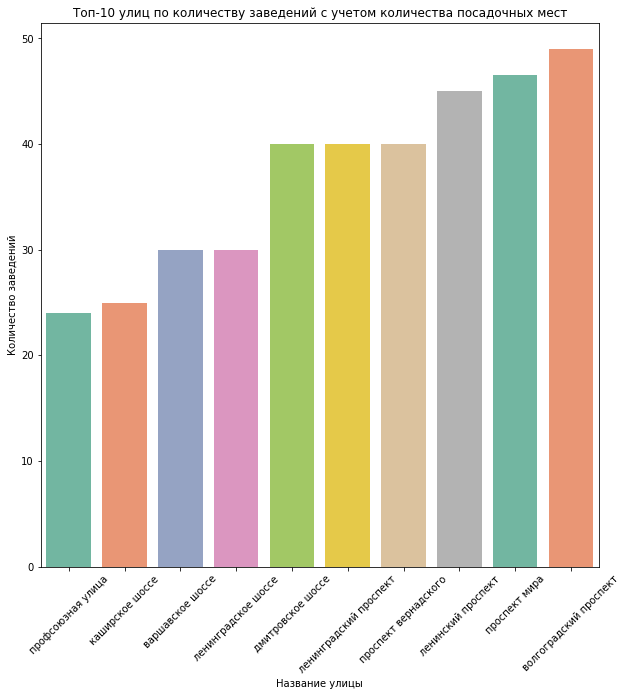

In [38]:
fig, ax = plt.subplots()
ax = sns.barplot(data = top10_streats_data_pivot, x = top10_streats_data_pivot.index, y = 'seats', palette = 'Set2')
ax.set_title('')
#ax.set_xlim(-10,400)
ax.set_title('Топ-10 улиц по количеству заведений с учетом количества посадочных мест')
ax.set_xlabel('Название улицы')
ax.set_ylabel('Количество заведений')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.xticks(rotation = 45)
plt.show()

### Шаг 4. Общий вывод. Рекомендации  <a id="step4"></a>   
</div>    


Несмотря на проделанную работу и аналитику делать выводы только на основании количества мест, а также наличия рядом большого или, наоборот, малого количества конкурентов не стоит.

Что мы знаем:
- У наc роботы, которые на 99% не работают быстрее, чем люди, поэтому нам не нужно большое количество мест;
- Таким образом нам нужно открывать что-то похожее на робокафе или робар (целый нейминг готов) :);
- Да, нам нужно разместиться на популярной улице.
- Нет, возвращаясь к количеству посадочных мест, улицы с большой медианной вместимостью нам не подойдут
- Нам стоит ориентироваться на такие улицы, как Профсоюзная, Ленинский проспект и в целом район Парка Культуры и Замоскворечья. Эти районы особенно цифровизированы. Наша аудитория может быть как раз здесь.
- Нам не стоит выбирать для размещения пилотного проекта Волгоградский проспект, Дмитровское, Каширское и Варшавское шоссе.



Презентация: <https://yadi.sk/i/WpW5EVKPdYbGeQ> 

https://yadi.sk/i/aLlgMCRdWTA7rA